<a href="https://colab.research.google.com/github/spshreya/DigitalTwinNSS/blob/main/network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 5.3 MB/s eta 0:00:00


In [ ]:
import visualkeras

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Feed_NSS2.csv')
df.head()

,UKPRN,Subject Code,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
0,10000055,CAH22-01,0.9091,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,0.9091,0.9091,0.9091,1.0000,1.0000,1.0000,1.0000,0.9091,0.9091,1.0000
1,10000163,CAH02-06,0.6863,0.6078,0.8431,0.6078,0.5098,0.6471,0.7647,0.4608,...,0.7059,0.7745,0.6863,0.6535,0.8922,0.6765,0.2941,0.2549,0.5588,0.4412
2,10000216,CAH20-02,0.9412,0.9412,0.9412,0.9412,0.8235,0.9412,0.7647,0.7059,...,0.7647,0.7647,0.7647,0.9412,1.0000,1.0000,0.8235,0.5882,0.8571,0.8824
3,10000291,CAH02-04,0.8402,0.8031,0.8105,0.8398,0.8519,0.8418,0.9219,0.8086,...,0.7569,0.8947,0.8442,0.7047,0.7667,0.8184,0.7137,0.5344,0.5745,0.7569
4,10000291,CAH02-05,0.8750,0.7500,0.8188,0.7938,0.7875,0.8563,0.7063,0.7250,...,0.7885,0.8750,0.8471,0.6313,0.8250,0.8491,0.6730,0.5032,0.6218,0.8176


In [ ]:
df.shape

(3293, 29)

In [ ]:
X = df.iloc[:, 2:28].values  # Q01 to Q26
y = df.iloc[:, 28].values    # Q27

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

In [ ]:
import time

In [ ]:
# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',      # Metric to be monitored
    patience=10,             # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Whether to restore model weights from the epoch with the best value of the monitored quantity
)
start_time = time.time()
# Fit the model with early stopping
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,   # Use 20% of the training data for validation
    callbacks=[early_stopping]
)
end_time = time.time()
training_time = end_time - start_time

Epoch 1/50
66/66 [==============================] - 5s 16ms/step - loss: 0.0599 - mae: 0.1473 - val_loss: 0.0061 - val_mae: 0.0608
Epoch 2/50
66/66 [==============================] - 0s 6ms/step - loss: 0.0055 - mae: 0.0555 - val_loss: 0.0051 - val_mae: 0.0539
Epoch 3/50
66/66 [==============================] - 1s 20ms/step - loss: 0.0048 - mae: 0.0520 - val_loss: 0.0045 - val_mae: 0.0522
Epoch 4/50
66/66 [==============================] - 1s 10ms/step - loss: 0.0043 - mae: 0.0484 - val_loss: 0.0040 - val_mae: 0.0488
Epoch 5/50
66/66 [==============================] - 1s 17ms/step - loss: 0.0039 - mae: 0.0467 - val_loss: 0.0036 - val_mae: 0.0449
Epoch 6/50
66/66 [==============================] - 1s 20ms/step - loss: 0.0036 - mae: 0.0449 - val_loss: 0.0034 - val_mae: 0.0439
Epoch 7/50
66/66 [==============================] - 1s 19ms/step - loss: 0.0036 - mae: 0.0444 - val_loss: 0.0034 - val_mae: 0.0439
Epoch 8/50
66/66 [==============================] - 1s 17ms/step - loss: 0.0035 - ma

In [ ]:
#visualkeras.layered_view(model)

In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {mae}')

21/21 [==============================] - 0s 1ms/step - loss: 0.0031 - mae: 0.0420
Test MAE: 0.04199599474668503


In [ ]:
training_time #in seconds

45.31731939315796

In [ ]:
predictions = model.predict(X_test)

21/21 [==============================] - 0s 2ms/step


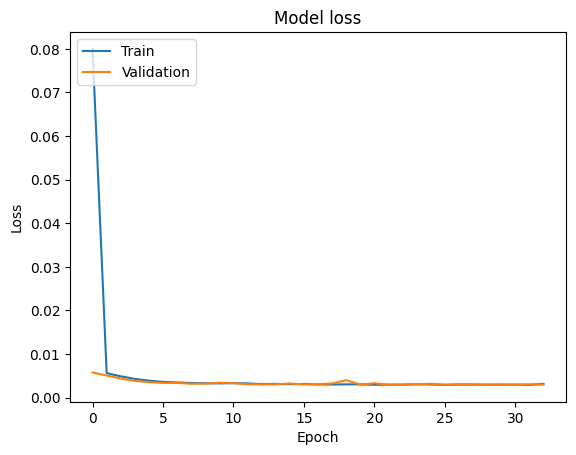

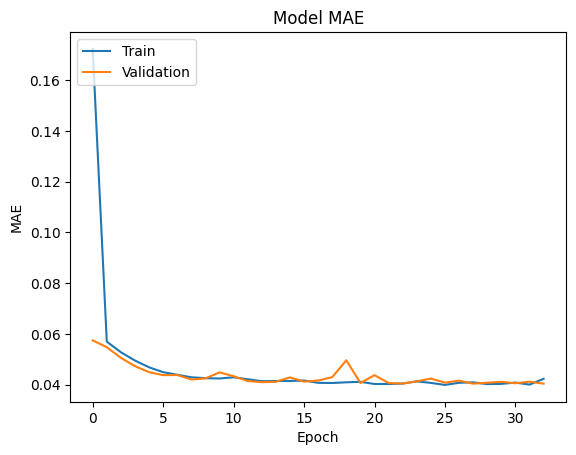

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation MAE values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

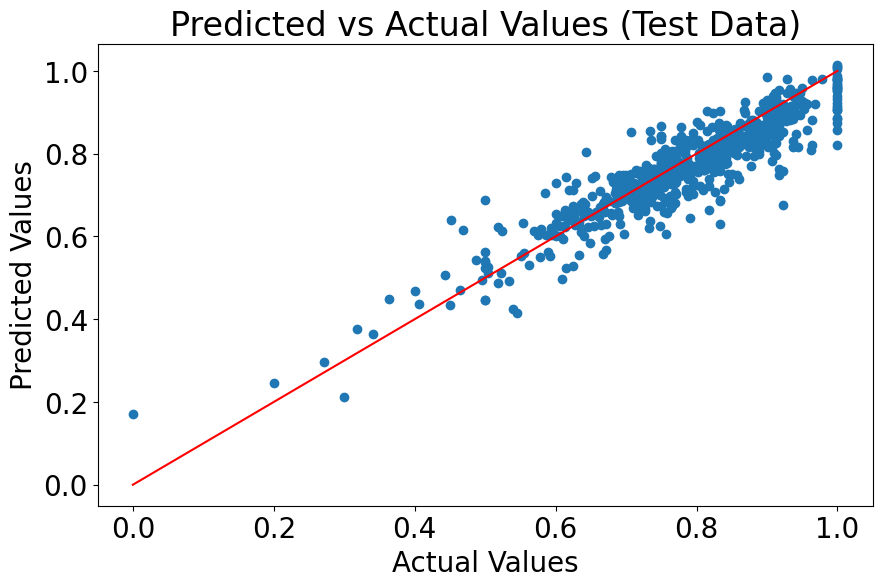

In [ ]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # identity line
plt.title('Predicted vs Actual Values (Test Data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

83/83 [==============================] - 0s 1ms/step


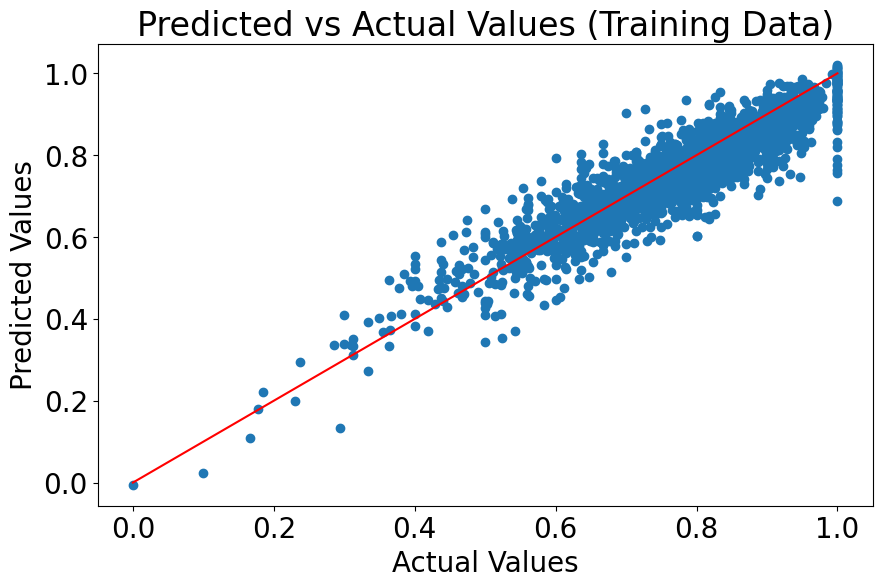

In [ ]:
train_predictions = model.predict(X_train)

# Plot actual vs predicted values for the training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')  # identity line
plt.title('Predicted vs Actual Values (Training Data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

<ipython-input-30-6912b02cec20>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals) # you may select the no. of bins


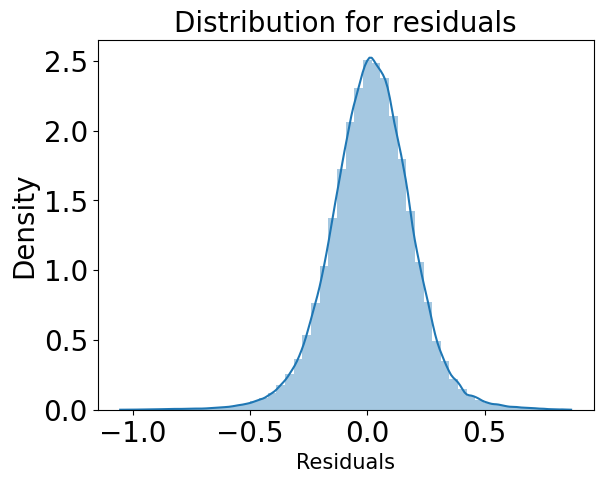

In [ ]:
residuals = y_test - predictions

import seaborn as sns
sns.distplot(residuals) # you may select the no. of bins
plt.title('Distribution for residuals', fontsize=20)
plt.xlabel('Residuals', fontsize = 15)
plt.show()

* Shape: The distribution appears approximately normal (bell-shaped), which is a desirable characteristic for residuals in many statistical analyses.
* Symmetry: The distribution looks fairly symmetric around zero, another positive indication for residuals.
* Center: The peak of the distribution is centered very close to zero, suggesting that on average, the model's predictions are unbiased.
* Spread: Most of the residuals fall between about -0.5 and 0.5, with very few extending beyond -0.75 or 0.75.
* Outliers: There don't appear to be any significant outliers or extreme values, as the tails of the distribution taper off smoothly.
* Homoscedasticity: The consistent shape of the distribution suggests relatively constant variance across the range of residuals.

### 2021 data

In [ ]:
df_21 = pd.read_csv('/content/drive/MyDrive/Feed_NSS2_21.csv')
df_21.head()

,UKPRN,Subject Code,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
0,10000047,CAH02-06,0.9167,0.9167,1.0000,1.0000,0.9167,0.9091,1.0000,0.9167,...,0.9091,0.9167,0.8889,0.6667,0.6364,1.0000,0.8333,0.6364,0.6000,1.0000
1,10000055,CAH06-01,0.8571,0.8571,0.7143,0.7143,0.8571,0.7857,0.7143,0.5714,...,0.4286,0.3846,0.4286,0.6429,0.7857,0.7143,0.7857,0.4286,0.5000,0.8571
2,10000055,CAH17-01,1.0000,1.0000,0.9000,0.9000,0.8000,1.0000,1.0000,0.5000,...,0.8000,1.0000,1.0000,0.8000,1.0000,0.9000,1.0000,0.8000,0.8571,1.0000
3,10000055,CAH22-01,0.9286,0.9286,0.7857,0.7857,0.8571,0.8571,0.8571,0.8571,...,0.7143,0.7143,0.5000,0.5714,0.7143,0.8571,0.8571,0.7143,0.5000,0.7857
4,10000080,CAH10-03,0.9000,0.9000,1.0000,1.0000,1.0000,0.9000,1.0000,0.7000,...,0.7000,0.7000,0.7000,0.8000,0.8000,0.8000,0.9000,0.8000,0.3000,0.8000


In [ ]:
X_21 = df_21.iloc[:, 2:28].values  # Q01 to Q26
y_21 = df_21.iloc[:, 28].values    # Q27

In [ ]:
predictions_2021 = model.predict(X_21)

106/106 [==============================] - 0s 2ms/step


In [ ]:
loss, mae = model.evaluate(X_21, y_21)
print(f'Test MAE: {mae}')

106/106 [==============================] - 0s 4ms/step - loss: 0.0032 - mae: 0.0418
Test MAE: 0.04184884577989578


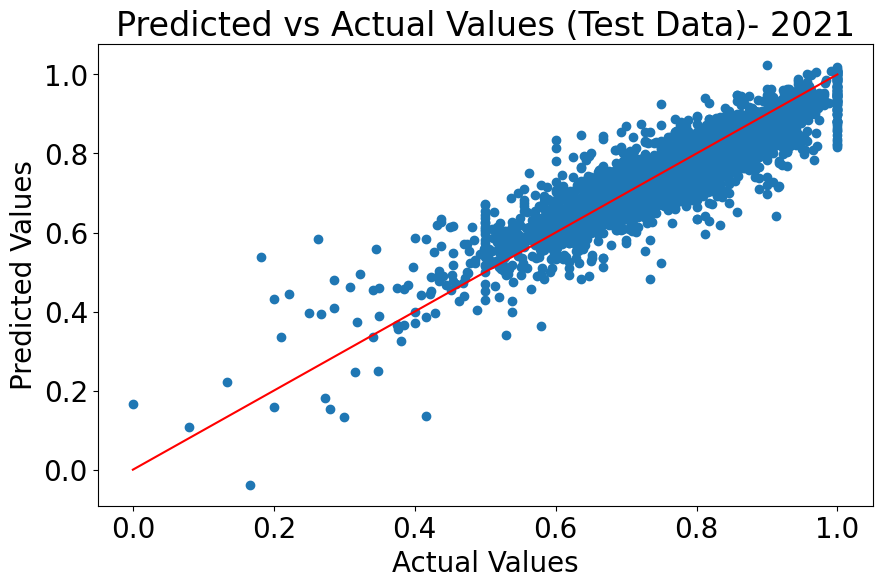

In [ ]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10, 6))
plt.scatter(y_21, predictions_2021)
plt.plot([min(y_21), max(y_21)], [min(y_21), max(y_21)], color='red')  # identity line
plt.title('Predicted vs Actual Values (Test Data)- 2021')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
temp = df_21[df_21['Q27']<0.5]
temp

,UKPRN,Subject Code,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
29,10000291,CAH25-02,0.6585,0.5854,0.5610,0.4756,0.4756,0.5610,0.5244,0.7317,...,0.5488,0.7805,0.5854,0.4146,0.6585,0.6795,0.3293,0.1875,0.5065,0.3415
75,10000747,CAH02-06,0.7273,0.6364,0.8182,0.6364,0.7273,0.8182,0.6364,0.6364,...,0.4545,0.4545,0.7273,0.5455,0.7273,0.7273,0.8182,0.4545,0.3636,0.4545
78,10000747,CAH13-01,0.5833,0.5000,0.2500,0.5833,0.5833,0.6667,0.5000,0.3333,...,0.3333,0.4167,0.3333,0.5000,0.6667,0.5000,0.5000,0.3333,0.2727,0.4167
100,10000820,CAH25-01,0.6875,0.6250,0.6875,0.5000,0.6250,0.8125,0.7500,0.7500,...,0.5000,0.2500,0.6000,0.5625,0.5333,0.6667,0.6250,0.3333,0.0714,0.4375
113,10000824,CAH16-01,0.7130,0.6043,0.6886,0.6096,0.6000,0.5833,0.5783,0.5088,...,0.5595,0.5565,0.5357,0.2870,0.4348,0.5652,0.4522,0.3246,0.4825,0.4739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3293,10036456,CAH25-02,0.7760,0.5698,0.6208,0.5354,0.4490,0.6729,0.7250,0.6208,...,0.5167,0.4490,0.3104,0.5354,0.8625,0.8104,0.5178,0.2760,0.4161,0.3979
3297,10037449,CAH07-04,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.4000,0.2000,...,0.7000,0.3000,0.6000,0.5000,0.5000,0.7000,0.4000,0.2000,0.3000,0.4000
3302,10037449,CAH25-02,0.4667,0.6000,0.4000,0.2667,0.3333,0.4667,0.3333,0.6667,...,0.4000,0.3333,0.4667,0.5333,0.8000,0.4667,0.3333,0.3333,0.3333,0.1333
3354,10067853,CAH25-02,0.7138,0.6749,0.5724,0.5583,0.6050,0.6512,0.5851,0.6042,...,0.4964,0.5438,0.4348,0.4346,0.6050,0.4698,0.5683,0.2664,0.2944,0.4337
